<a href="https://colab.research.google.com/github/gwhagerty/Energy-consumption-prediction-analysis/blob/master/Energy_consumption_Anaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Uploading local saved csv files to colab
from google.colab import files
uploaded = files.upload()

Saving PJME_hourly.csv to PJME_hourly.csv


In [ ]:
# Reading Uploaded csv files as dataframe
import io

data = pd.read_csv(io.BytesIO(uploaded['PJME_hourly.csv']), index_col = [0], parse_dates = [0])
data.head(2)

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0


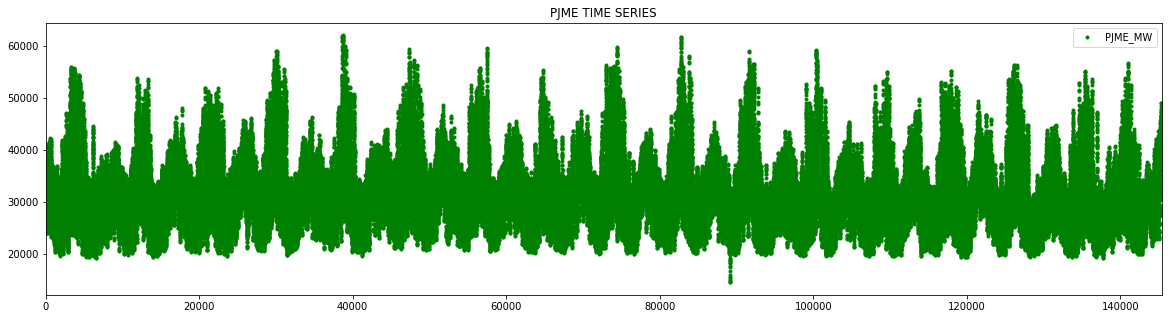

In [ ]:
data.plot(style = '.', color = 'green', figsize = (20,5), title = 'PJME TIME SERIES')

# EXPLORATORY DATA ANALYSIS

In [ ]:
data['date'] = data.index
data['hour'] = data['date'].dt.hour
data['week day'] = data['date'].dt.dayofweek
data['quarter of year'] = data['date'].dt.quarter
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['day of year'] = data['date'].dt.dayofyear
data['day of month'] = data['date'].dt.day
data['week of year'] = data['date'].dt.weekofyear
data = data.drop(['date'], axis = 1)

In [ ]:
data.tail(5)

,PJME_MW,hour,week day,quarter of year,month,year,day of year,day of month,week of year
Datetime,,,,,,,,,
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1,1,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1,1,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1,1,1
2018-01-01 23:00:00,40164.0,23,0,1,1,2018,1,1,1
2018-01-02 00:00:00,38608.0,0,1,1,1,2018,2,2,1


In [ ]:
data.isnull().sum()

PJME_MW            0
hour               0
week day           0
quarter of year    0
month              0
year               0
day of year        0
day of month       0
week of year       0
dtype: int64

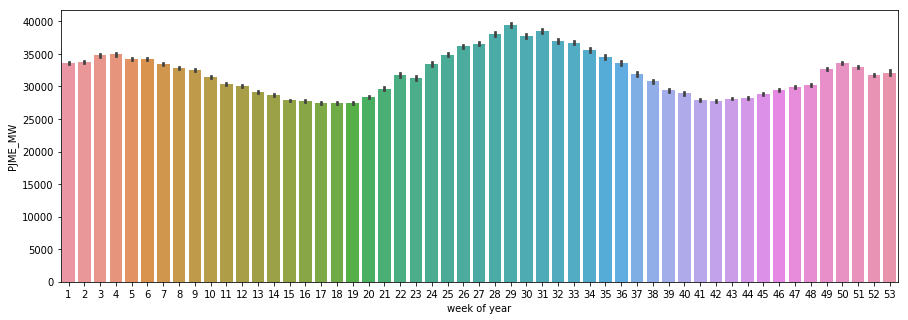

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot('week of year','PJME_MW', data = data)

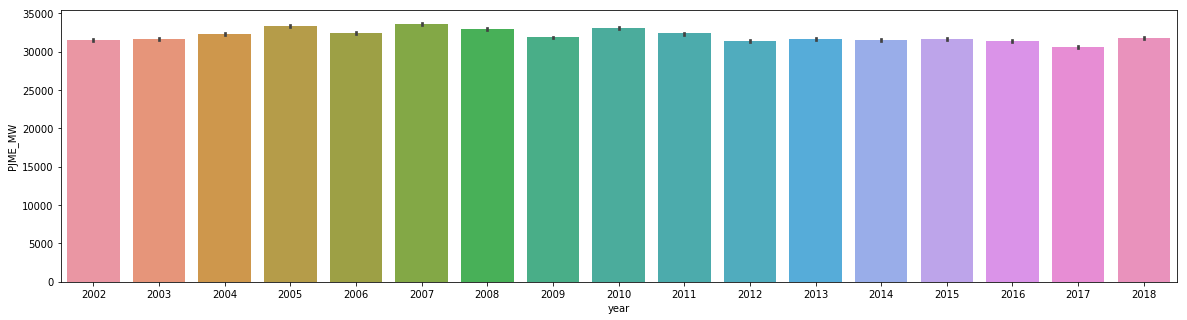

In [ ]:
plt.figure(figsize = (20,5))
sns.barplot('year','PJME_MW', data = data)

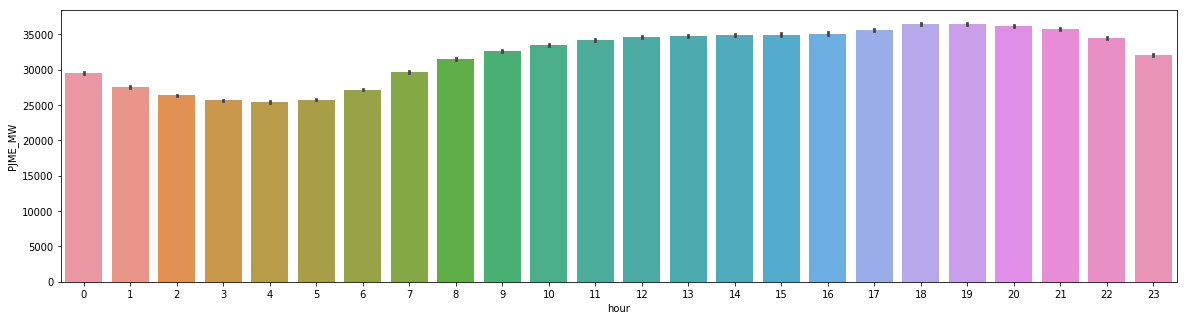

In [ ]:
plt.figure(figsize = (20,5))
sns.barplot('hour','PJME_MW', data = data)

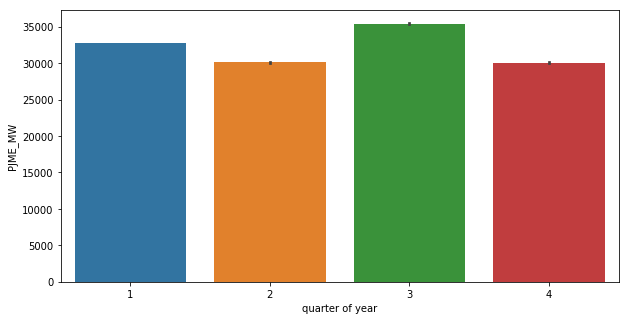

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot('quarter of year','PJME_MW', data = data)

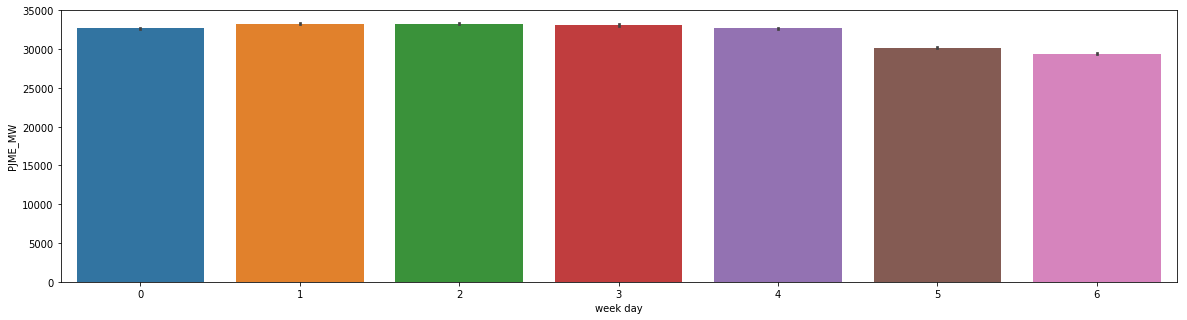

In [ ]:
plt.figure(figsize = (20,5))
sns.barplot('week day','PJME_MW', data = data)

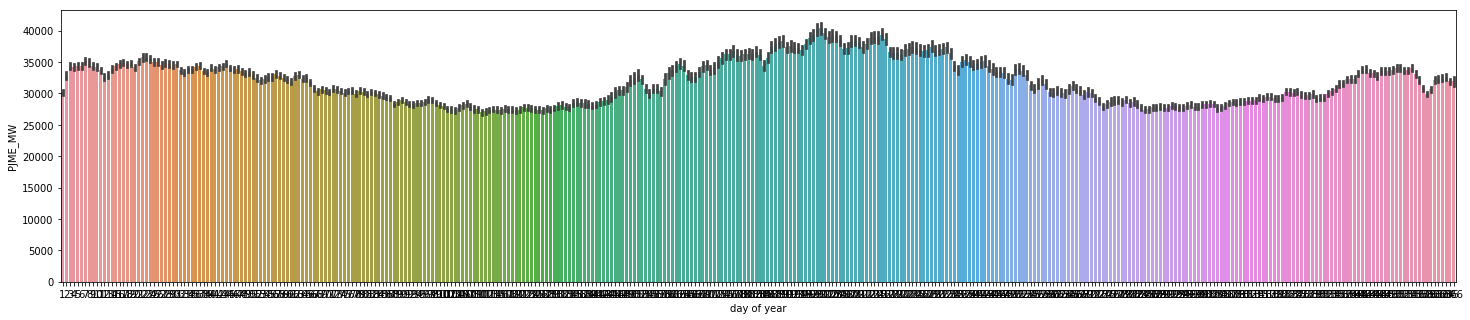

In [ ]:
plt.figure(figsize = (25,5))
sns.barplot('day of year','PJME_MW', data = data)

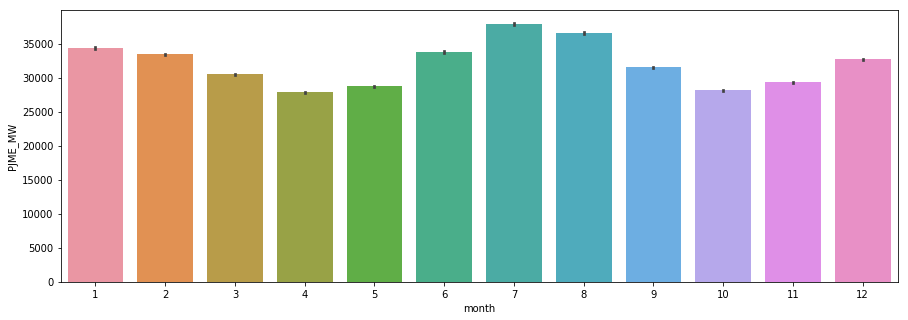

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot('month','PJME_MW', data = data)

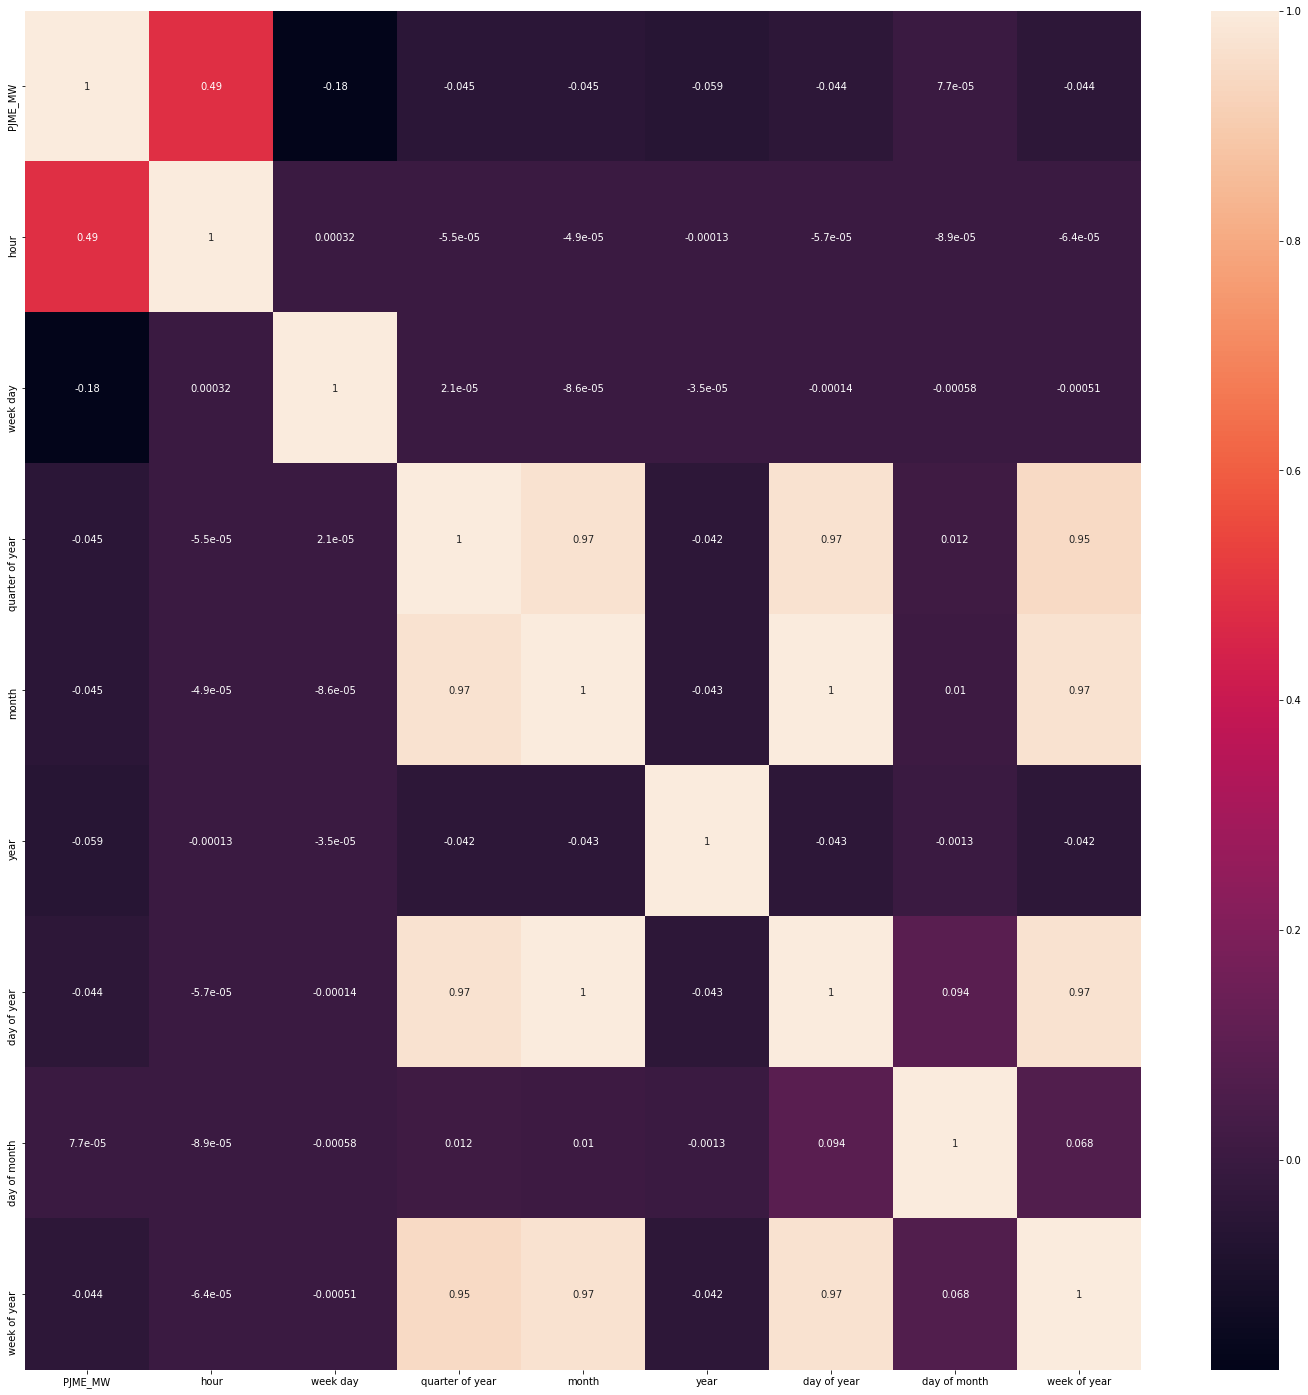

In [ ]:
plt.figure(figsize = (25,25))
data.corr()
sns.heatmap(data.corr(), annot = True)

# BUILDING A MODEL

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['PJME_MW'], axis = 1)
Y = data['PJME_MW']

In [ ]:
x_train,x_test,y_train, y_test = train_test_split(X,Y, random_state = 42, test_size = 0.25)

In [ ]:
x_train.dtypes

hour               int64
week day           int64
quarter of year    int64
month              int64
year               int64
day of year        int64
day of month       int64
week of year       int64
dtype: object

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
lr.intercept_

In [ ]:
test = lr.predict(x_test)